# Probability

In [4]:
import enum, random

In [5]:
# An Enum is a typed set of enumerated values. We can use them
# to make our code more descriptive and readable.
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

In [6]:
def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

In [7]:
both_girls = 0
older_girl = 0
either_girl = 0

In [8]:
random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    
    if older == Kid.GIRL:
        older_girl += 1
        
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
        
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

In [10]:
print(older_girl)
print(both_girls)
print(either_girl)

4937
2472
7464


In [9]:
print("P(both | older):", both_girls / older_girl)     # 0.514 ~ 1/2
print("P(both | either): ", both_girls / either_girl)  # 0.342 ~ 1/3
    
assert 0.48 < both_girls / older_girl < 0.52
assert 0.30 < both_girls / either_girl < 0.35

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


## Probability Density Function (PDF) for a uniform distribution

In [11]:
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

In [13]:
uniform_pdf(0.34)

1

In [61]:
xs = [x / 100 for x in range(-200, 200)]
xs

[-2.0,
 -1.99,
 -1.98,
 -1.97,
 -1.96,
 -1.95,
 -1.94,
 -1.93,
 -1.92,
 -1.91,
 -1.9,
 -1.89,
 -1.88,
 -1.87,
 -1.86,
 -1.85,
 -1.84,
 -1.83,
 -1.82,
 -1.81,
 -1.8,
 -1.79,
 -1.78,
 -1.77,
 -1.76,
 -1.75,
 -1.74,
 -1.73,
 -1.72,
 -1.71,
 -1.7,
 -1.69,
 -1.68,
 -1.67,
 -1.66,
 -1.65,
 -1.64,
 -1.63,
 -1.62,
 -1.61,
 -1.6,
 -1.59,
 -1.58,
 -1.57,
 -1.56,
 -1.55,
 -1.54,
 -1.53,
 -1.52,
 -1.51,
 -1.5,
 -1.49,
 -1.48,
 -1.47,
 -1.46,
 -1.45,
 -1.44,
 -1.43,
 -1.42,
 -1.41,
 -1.4,
 -1.39,
 -1.38,
 -1.37,
 -1.36,
 -1.35,
 -1.34,
 -1.33,
 -1.32,
 -1.31,
 -1.3,
 -1.29,
 -1.28,
 -1.27,
 -1.26,
 -1.25,
 -1.24,
 -1.23,
 -1.22,
 -1.21,
 -1.2,
 -1.19,
 -1.18,
 -1.17,
 -1.16,
 -1.15,
 -1.14,
 -1.13,
 -1.12,
 -1.11,
 -1.1,
 -1.09,
 -1.08,
 -1.07,
 -1.06,
 -1.05,
 -1.04,
 -1.03,
 -1.02,
 -1.01,
 -1.0,
 -0.99,
 -0.98,
 -0.97,
 -0.96,
 -0.95,
 -0.94,
 -0.93,
 -0.92,
 -0.91,
 -0.9,
 -0.89,
 -0.88,
 -0.87,
 -0.86,
 -0.85,
 -0.84,
 -0.83,
 -0.82,
 -0.81,
 -0.8,
 -0.79,
 -0.78,
 -0.77,
 -0.76,
 -0.75,
 -0.7

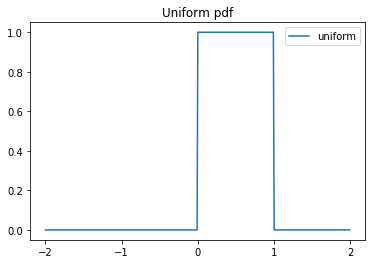

In [65]:
plt.plot(xs,[uniform_pdf(x) for x in xs],'-',label='uniform')
plt.xticks(range(-2, 3))
plt.legend()
plt.title("Uniform pdf")
plt.savefig('images/uniform_pdf.png')
plt.show()

## Cumulative Distribution Function (CDF) for a uniform distribution

In [14]:
def uniform_cdf(x: float) -> float:
    """Returns the probability that a uniform random variable is <= x"""
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X <= 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1

In [15]:
uniform_cdf(0.34)

0.34

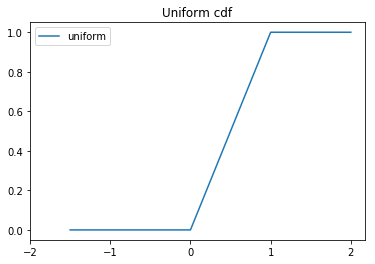

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

xs = [x / 2 for x in range(-3, 5)]

plt.plot(xs,[uniform_cdf(x) for x in xs],'-',label='uniform')
plt.xticks(range(-2, 3))
plt.legend()
plt.title("Uniform cdf")
plt.savefig('images/uniform_cdf.png')
plt.show()

## PDF for a normal distribution

<img src="images/normal_pdf.png" alt="Dot product" style="width: 600px;"/>

In [16]:
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

In [68]:
xs = [x / 10 for x in range(-50, 50)]
xs

[-5.0,
 -4.9,
 -4.8,
 -4.7,
 -4.6,
 -4.5,
 -4.4,
 -4.3,
 -4.2,
 -4.1,
 -4.0,
 -3.9,
 -3.8,
 -3.7,
 -3.6,
 -3.5,
 -3.4,
 -3.3,
 -3.2,
 -3.1,
 -3.0,
 -2.9,
 -2.8,
 -2.7,
 -2.6,
 -2.5,
 -2.4,
 -2.3,
 -2.2,
 -2.1,
 -2.0,
 -1.9,
 -1.8,
 -1.7,
 -1.6,
 -1.5,
 -1.4,
 -1.3,
 -1.2,
 -1.1,
 -1.0,
 -0.9,
 -0.8,
 -0.7,
 -0.6,
 -0.5,
 -0.4,
 -0.3,
 -0.2,
 -0.1,
 0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9]

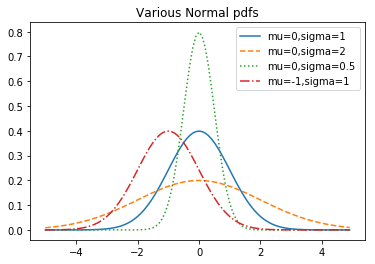

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1') # standard normal distribution
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.savefig('images/various_normal_pdfs.png')
plt.show()

## CDF for a normal distribution

In [69]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

In [70]:
xs = [x / 10.0 for x in range(-50, 50)]

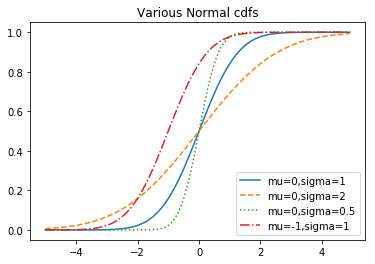

In [71]:
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.savefig('images/various_normal_cdfs.png')
plt.show()

## Normal CDF inverted

In [72]:
def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z

In [75]:
normal_cdf(0.1)

0.539827837277029

In [79]:
inverse_normal_cdf(0.54)

0.10043144226074219

## Central Limit Theorem

In [80]:
import random

def bernoulli_trial(p: float) -> int:
    """Returns 1 with probability p and 0 with probability 1-p"""
    return 1 if random.random() < p else 0

In [81]:
def binomial(n: int, p: float) -> int:
    """Returns the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for _ in range(n))

In [82]:
from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Picks points from a Binomial(n, p) and plots their histogram"""
    data = [binomial(n, p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.savefig('images/binomial_histogram.png')
    plt.show()

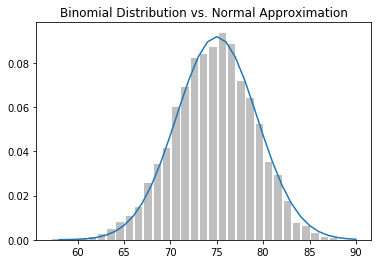

In [83]:
binomial_histogram(0.75, 100, 10000)